In [10]:
%reload_ext autoreload
%autoreload 2

import os, sys, numpy as np, pandas as pd, tensorflow as tf, cv2
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from matplotlib import pyplot as plt
from src import utils


# plt.style.use('ggplot')
plt.style.use('seaborn-whitegrid') # 

%matplotlib inline

In [3]:
raw = pd.read_csv('./data/raw_tr_financial_churn.csv')
raw.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,6396,15707918,Bentley,741,Germany,Female,36,0,127675.39,2,1,0,74260.16,0
1,6055,15773013,Uvarov,633,France,Female,47,0,0.00,1,1,1,6342.84,1
2,8866,15639004,Chiemezie,668,France,Male,72,2,0.00,2,1,1,70783.61,0
3,9098,15606901,Graham,728,France,Male,43,7,0.00,2,1,0,40023.70,0
4,3865,15808960,Alleyne,620,Germany,Male,40,5,108197.11,2,1,0,49722.34,0


count    7500.000000
mean       39.004267
std        10.500007
min        18.000000
25%        32.000000
50%        37.000000
75%        44.000000
max        92.000000
Name: Age, dtype: float64


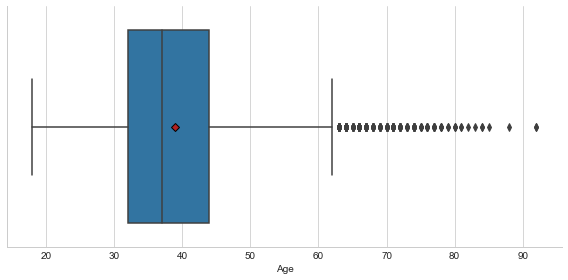

In [24]:
print( raw.Age.describe() )
meanprops = dict(marker='D', markeredgecolor='black', markerfacecolor='firebrick')
sns.catplot(x="Age", data=raw, kind="box", height=4, aspect=2, showmeans=True, meanprops=meanprops)
plt.show()

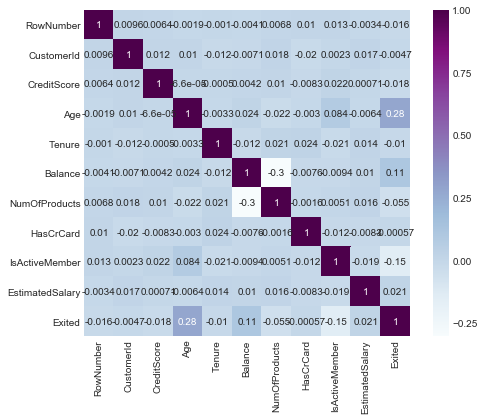

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(raw.corr(), annot=True, square = True, cmap = "BuPu")
plt.show()